In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_table("XYZCorp_LendingData.txt",low_memory=False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.shape

(855969, 73)

# Missing Values

In [6]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

<AxesSubplot:>

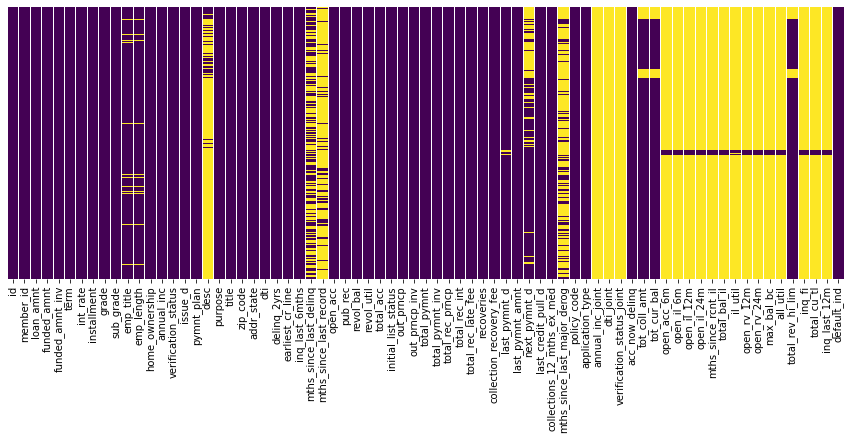

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="viridis")

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

# Performing EDA

# Distribution Table

<AxesSubplot:xlabel='default_ind', ylabel='count'>

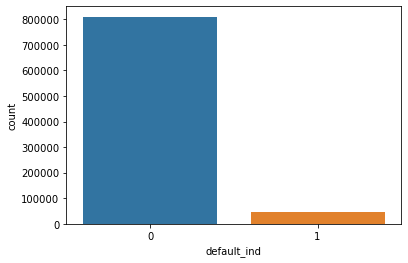

In [8]:
sns.countplot("default_ind",data=df)

In [9]:
ph=df.isnull().sum()
for i in range(len(ph)):
    if ph[i]>800000:
        del df["{}".format(ph.index[i])]

In [10]:
df.shape

(855969, 56)

In [11]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [12]:
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
id,1.000000,0.999431,0.062971,0.065192,0.069491,-0.143769,0.023647,0.034160,0.066580,0.049909,...,-0.073399,-0.228774,0.050921,0.056368,NaN,0.016849,0.004233,0.007261,0.048011,-0.219832
member_id,0.999431,1.000000,0.063603,0.065862,0.070248,-0.142996,0.024311,0.034338,0.066620,0.050174,...,-0.073358,-0.228243,0.051038,0.056395,NaN,0.016960,0.004266,0.007284,0.047950,-0.220181
loan_amnt,0.062971,0.063603,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.020189,-0.000739,...,0.055135,0.233596,-0.017042,-0.037766,NaN,0.003572,-0.004272,0.329130,0.312072,-0.004907
funded_amnt,0.065192,0.065862,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.020583,-0.000424,...,0.054898,0.233134,-0.016887,-0.037759,NaN,0.003675,-0.004272,0.329128,0.312071,-0.005797
funded_amnt_inv,0.069491,0.070248,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.021489,0.000050,...,0.053082,0.232029,-0.016556,-0.037724,NaN,0.003856,-0.004271,0.329152,0.312107,-0.008209
int_rate,-0.143769,-0.142996,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.078454,0.055400,...,0.074360,0.107346,0.012841,-0.011622,NaN,0.026476,0.001129,-0.091430,-0.165533,0.155037
installment,0.023647,0.024311,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.013909,0.007224,...,0.057180,0.243246,-0.014565,-0.039536,NaN,0.006273,-0.003540,0.298352,0.286857,0.004753
annual_inc,0.034160,0.034338,0.335209,0.335002,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.047749,...,0.006805,0.092662,-0.003789,-0.037209,NaN,0.014877,0.001005,0.422618,0.271059,-0.037066
dti,0.066580,0.066620,0.020189,0.020583,0.021489,0.078454,0.013909,-0.086821,1.000000,-0.002677,...,0.002923,-0.028601,-0.000117,0.007187,NaN,0.003227,-0.001995,-0.007133,0.032430,0.004429
delinq_2yrs,0.049909,0.050174,-0.000739,-0.000424,0.000050,0.055400,0.007224,0.047749,-0.002677,1.000000,...,0.001467,-0.018805,0.063019,-0.424868,NaN,0.130420,0.000154,0.064618,-0.040575,-0.009186


In [13]:
ph = df[df.columns].corr()["default_ind"][:]
ph

id                            -0.219832
member_id                     -0.220181
loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
inq_last_6mths                 0.074407
mths_since_last_delinq         0.001317
mths_since_last_record         0.061484
open_acc                      -0.021698
pub_rec                       -0.019607
revol_bal                     -0.020696
revol_util                     0.044497
total_acc                     -0.021087
out_prncp                     -0.225960
out_prncp_inv                 -0.225959
total_pymnt                   -0.039220
total_pymnt_inv               -0.040232
total_rec_prncp               -0.090336
total_rec_int                  0.046050
total_rec_late_fee             0.140760


In [14]:
ph2=[]
for i in range(len(ph)):
    if ph[i]<0.02 and ph[i]>(-0.02):
        ph2.append(ph.index[i])

In [15]:
for i in range(len(ph2)):
    del df["{}".format(ph2[i])]

In [16]:
df.shape

(855969, 44)

In [17]:
df.columns

Index(['id', 'member_id', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'policy_code', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [18]:
df["application_type"].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

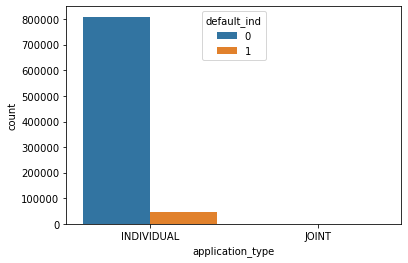

In [19]:
sns.countplot("application_type",data=df,hue="default_ind")

In [20]:
df["verification_status"].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

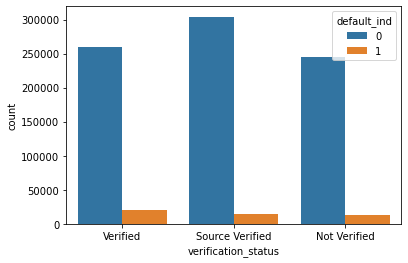

In [21]:
sns.countplot("verification_status",data=df,hue="default_ind")

In [22]:
df1=df.groupby("application_type")

In [23]:
df1["default_ind"].value_counts()

application_type  default_ind
INDIVIDUAL        0              809060
                  1               46467
JOINT             0                 442
Name: default_ind, dtype: int64

# Adding Zeros(0) into Ones(1)

In [24]:
df["application_type"]==np.where(df["application_type"]=="INDIVIDUAL",0,df["application_type"])
df["application_type"]==np.where(df["application_type"]=="JOINT",1,df["application_type"])

0         True
1         True
2         True
3         True
4         True
          ... 
855964    True
855965    True
855966    True
855967    True
855968    True
Name: application_type, Length: 855969, dtype: bool

In [25]:
del df["id"]
del df["member_id"]
del df["policy_code"]
del df["pymnt_plan"]
del df["emp_title"]
del df["title"]
del df["tot_cur_bal"]
del df["total_rev_hi_lim"]
del df["last_credit_pull_d"]
del df["next_pymnt_d"]
del df["earliest_cr_line"]
del df["addr_state"]
del df["last_pymnt_d"]
del df["desc"]
del df["zip_code"]
del df["emp_length"]
del df["home_ownership"]

In [26]:
df.head()

,term,int_rate,grade,sub_grade,annual_inc,verification_status,issue_d,purpose,inq_last_6mths,mths_since_last_record,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,default_ind
0,36 months,10.65,B,B2,24000.0,Verified,Dec-2011,credit_card,1.0,NaN,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,INDIVIDUAL,0
1,60 months,15.27,C,C4,30000.0,Source Verified,Dec-2011,car,5.0,NaN,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,INDIVIDUAL,1
2,36 months,15.96,C,C5,12252.0,Not Verified,Dec-2011,small_business,2.0,NaN,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,INDIVIDUAL,0
3,36 months,13.49,C,C1,49200.0,Source Verified,Dec-2011,other,1.0,NaN,...,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,INDIVIDUAL,0
4,60 months,12.69,B,B5,80000.0,Source Verified,Dec-2011,other,0.0,NaN,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,INDIVIDUAL,0


In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
df["mths_since_last_record"].value_counts()
df["revol_util"].value_counts()

0.00      3361
58.00     1723
53.00     1702
59.00     1694
61.00     1684
          ... 
153.00       1
125.60       1
152.50       1
17.78        1
120.80       1
Name: revol_util, Length: 1338, dtype: int64

In [29]:
#mths_since_last_record replace with mode
#revol_util replace with mode
df["mths_since_last_record"].fillna(df["mths_since_last_record"].mode()[0],inplace=True)
df["revol_util"].fillna(df["revol_util"].mode()[0],inplace=True)

cat=["mths_since_last_record","revol_util"]

for i in cat:
    le=preprocessing.LabelEncoder()
    df[i]=le.fit_transform(df[i].astype("int"))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   term                     855969 non-null  object 
 1   int_rate                 855969 non-null  float64
 2   grade                    855969 non-null  object 
 3   sub_grade                855969 non-null  object 
 4   annual_inc               855969 non-null  float64
 5   verification_status      855969 non-null  object 
 6   issue_d                  855969 non-null  object 
 7   purpose                  855969 non-null  object 
 8   inq_last_6mths           855969 non-null  float64
 9   mths_since_last_record   855969 non-null  int64  
 10  open_acc                 855969 non-null  float64
 11  revol_bal                855969 non-null  float64
 12  revol_util               855969 non-null  int64  
 13  total_acc                855969 non-null  float64
 14  init

# Filling values with Mean value

In [31]:
df["total_pymnt"].fillna(value=df["total_pymnt"].mean)
df["total_pymnt_inv"].fillna(value=df["total_pymnt_inv"].mean)
df["total_rec_int"].fillna(value=df["total_rec_int"].mean)

0          861.07
1          435.17
2          603.65
3         2209.33
4         1009.07
           ...   
855964    1027.35
855965    2465.65
855966    1925.24
855967    2234.98
855968    2054.70
Name: total_rec_int, Length: 855969, dtype: float64

In [32]:
df.isnull().sum()

term                       0
int_rate                   0
grade                      0
sub_grade                  0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
inq_last_6mths             0
mths_since_last_record     0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
default_ind                0
dtype: int64

<AxesSubplot:>

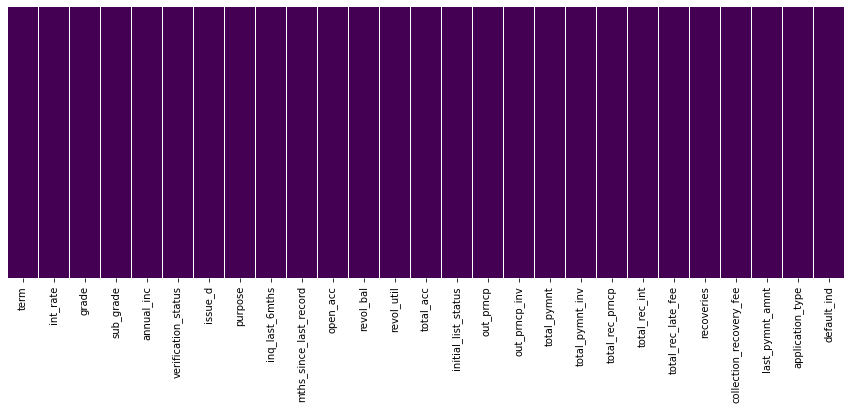

In [61]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="viridis")

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-63-16fea9378601>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [36]:
df.head()

,term,int_rate,grade,sub_grade,annual_inc,verification_status,issue_d,purpose,inq_last_6mths,mths_since_last_record,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,default_ind
0,0,10.65,1,6,24000.0,2,21,1,1.0,61,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0,0
1,1,15.27,2,13,30000.0,1,21,0,5.0,61,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0,1
2,0,15.96,2,14,12252.0,0,21,11,2.0,61,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0,0
3,0,13.49,2,10,49200.0,1,21,9,1.0,61,...,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0,0
4,1,12.69,1,9,80000.0,1,21,9,0.0,61,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   term                     855969 non-null  int64  
 1   int_rate                 855969 non-null  float64
 2   grade                    855969 non-null  int64  
 3   sub_grade                855969 non-null  int64  
 4   annual_inc               855969 non-null  float64
 5   verification_status      855969 non-null  int64  
 6   issue_d                  855969 non-null  int64  
 7   purpose                  855969 non-null  int64  
 8   inq_last_6mths           855969 non-null  float64
 9   mths_since_last_record   855969 non-null  int64  
 10  open_acc                 855969 non-null  float64
 11  revol_bal                855969 non-null  float64
 12  revol_util               855969 non-null  int64  
 13  total_acc                855969 non-null  float64
 14  init

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split( df.drop("default_ind",axis=1),df["default_ind"],test_size=0.3,random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
logmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
y_test.head(5)

848183    0
355813    0
665073    0
848317    0
760609    0
Name: default_ind, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
accuracy=confusion_matrix(y_test,predictions)

In [51]:
accuracy

array([[242478,    232],
       [  3548,  10533]], dtype=int64)

In [52]:
logmodel.score(X_train,y_train)

0.9855134868102634

In [53]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    242710
           1       0.98      0.75      0.85     14081

    accuracy                           0.99    256791
   macro avg       0.98      0.87      0.92    256791
weighted avg       0.99      0.99      0.98    256791



In [55]:
#import pycaret

In [136]:
#from pycaret.classification import *
clf1 = setup(data=df , target="default_ind")

Setup Succesfully Completed!


,Description,Value
0,session_id,5564
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(855969, 27)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [137]:
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9973,0.9945,0.9540,0.9969,0.9750,0.9736,0.9738,22.0939
1,CatBoost Classifier,0.9973,0.9940,0.9529,0.9972,0.9745,0.9731,0.9734,61.9945
2,Light Gradient Boosting Machine,0.9968,0.9935,0.9530,0.9881,0.9702,0.9685,0.9687,2.9154
3,Random Forest Classifier,0.9952,0.9841,0.9156,0.9948,0.9535,0.9510,0.9519,2.1571
4,Gradient Boosting Classifier,0.9948,0.9900,0.9166,0.9875,0.9507,0.9480,0.9487,153.7578
5,Decision Tree Classifier,0.9936,0.9698,0.9431,0.9388,0.9410,0.9376,0.9376,8.0149
6,Extra Trees Classifier,0.9929,0.9882,0.8782,0.9892,0.9303,0.9266,0.9284,14.3738
7,Ada Boost Classifier,0.9900,0.9896,0.8475,0.9640,0.9019,0.8967,0.8988,34.3356
8,Logistic Regression,0.9888,0.9823,0.8143,0.9757,0.8876,0.8818,0.8858,6.6755
9,K Neighbors Classifier,0.9774,0.9491,0.7213,0.8407,0.7764,0.7646,0.7671,8.8863


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5564, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [138]:
#lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9890,0.9843,0.8145,0.9803,0.8898,0.8840,0.8882
1,0.9889,0.9863,0.8217,0.9698,0.8896,0.8838,0.8872
2,0.9869,0.9808,0.7785,0.9743,0.8655,0.8586,0.8646
3,0.9896,0.9836,0.8215,0.9840,0.8955,0.8900,0.8941
4,0.9888,0.9819,0.8289,0.9597,0.8895,0.8836,0.8863
5,0.9885,0.9806,0.8053,0.9800,0.8841,0.8782,0.8829
6,0.9886,0.9797,0.8105,0.9753,0.8853,0.8793,0.8835
7,0.9896,0.9855,0.8217,0.9840,0.8956,0.8902,0.8942
8,0.9892,0.9745,0.8145,0.9839,0.8913,0.8856,0.8900
9,0.9889,0.9855,0.8258,0.9653,0.8901,0.8843,0.8873


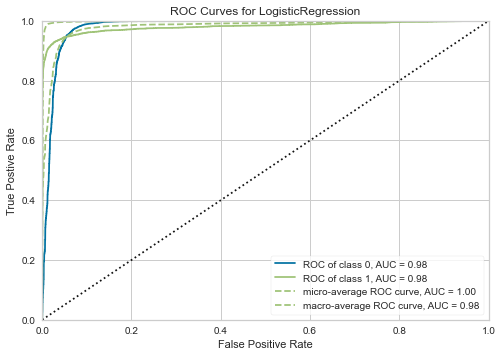

In [139]:
#plot_model(lr)

# Prediction of dataset

In [85]:
file = pd.DataFrame(predictions)

In [90]:
file.to_csv("final_banklending_prediction.csv",header=["Predictions"],index=True)

In [93]:
file.head(5)

,0
0,0
1,0
2,0
3,0
4,0
